In [1]:
import sys 
import gymnasium as gym
from gymnasium.wrappers import FlattenObservation
import kidspuzzles
from stable_baselines3 import A2C

n_digits = 2

env = gym.make('kidspuzzles/DigitsPuzzleEnv-v0', render_mode = 'human', n_digits = n_digits)

model = A2C("MultiInputPolicy", env, verbose=1, device="mps", tensorboard_log=f"./logs/a2c_digitspuzzle_nd{n_digits}/")
model.learn(total_timesteps=50_000)

Using mps device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_digitspuzzle_nd2/A2C_19


2025-01-13 10:01:37.703 python[4848:201436] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-13 10:01:37.703 python[4848:201436] +[IMKInputSession subclass]: chose IMKInputSession_Modern


---------------------------------------
| rollout/              |             |
|    ep_len_mean        | 300         |
|    ep_rew_mean        | -122        |
| time/                 |             |
|    fps                | 3           |
|    iterations         | 100         |
|    time_elapsed       | 128         |
|    total_timesteps    | 500         |
| train/                |             |
|    entropy_loss       | -1.68       |
|    explained_variance | -0.16527188 |
|    learning_rate      | 0.0007      |
|    n_updates          | 99          |
|    policy_loss        | -1.31       |
|    value_loss         | 0.434       |
---------------------------------------
----------------------------------------
| rollout/              |              |
|    ep_len_mean        | 300          |
|    ep_rew_mean        | -129         |
| time/                 |              |
|    fps                | 3            |
|    iterations         | 200          |
|    time_elapsed       | 254    

/Users/bapa/miniconda3/envs/gym/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.reward_list to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.reward_list` for environment variables or `env.get_wrapper_attr('reward_list')` that will search the reminding wrappers.
  logger.warn(


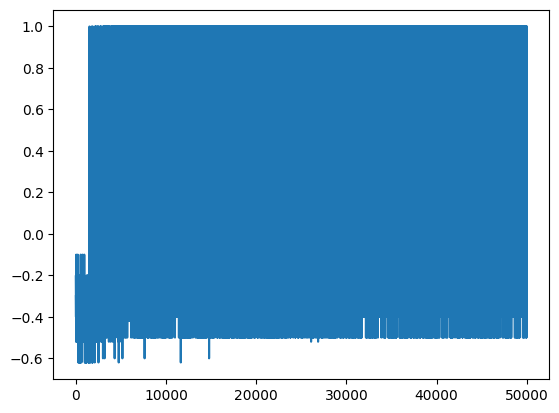

In [2]:
import matplotlib.pyplot as plt 
plt.plot(env.reward_list)

In [3]:
import time
vec_env = model.get_env()
observations = vec_env.reset()
reward_sum = 0
for _ in range(50):
    action, _state = model.predict(observations)
    observations, reward, terminated, info = vec_env.step(action)
    vec_env.render("human")
    time.sleep(5)

    reward_sum += reward
    if terminated:
        observations = vec_env.reset()

print("Total reward: ", reward_sum)

Total reward:  [3.7000003]


In [4]:
env.close()